In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_hdf('tng300-sam.h5')
df.shape

(1183265, 56)

In [30]:
def weighted_radius(Md,Rd,Mb,Rb):
    Mtot = Md+Mb
    return Md/Mtot*1.68*Rd + Mb/Mtot*Rb

In [31]:
df['GalpropWeightedRadius'] = weighted_radius(df['GalpropMdisk'],df['GalpropRdisk'],df['GalpropMbulge'],df['GalpropRbulge'])

In [38]:
amax = np.argmax(np.abs(df['GalpropWeightedRadius']-df['GalpropHalfmassRadius']))
tmp=df.iloc[amax,:]
tmp

GalpropMBH                          2.234950e+06
GalpropMH2                          1.384860e+07
GalpropMHI                          2.428640e+09
GalpropMHII                         1.217330e+10
GalpropMaccdot                      0.000000e+00
GalpropMaccdot_radio                1.093000e-05
GalpropMbulge                       1.596950e+09
GalpropMcold                        1.975970e+10
GalpropMstar                        2.823550e+09
GalpropMstar_merge                  9.775910e+08
GalpropMstrip                       1.003400e+12
GalpropMu_merger                    3.987110e-01
GalpropMvir                         1.003400e+12
GalpropOutflowRate_Mass             5.466710e-02
GalpropOutflowRate_Metal            6.035930e-03
GalpropRbulge                       2.422300e-01
GalpropRdisk                        2.924770e+01
GalpropRfric                        0.000000e+00
GalpropRhalo                        2.637410e+02
GalpropSatType                      0.000000e+00
GalpropSfr          

In [39]:
Md = tmp['GalpropMdisk']
Mb = tmp['GalpropMbulge']
Rd = tmp['GalpropRdisk']
Rb = tmp['GalpropRbulge']

In [42]:
import add_spin_r50 as a
from importlib import reload
reload(a)

<module 'add_spin_r50' from '/Users/ari/Projects/tng-code/add_spin_r50.py'>

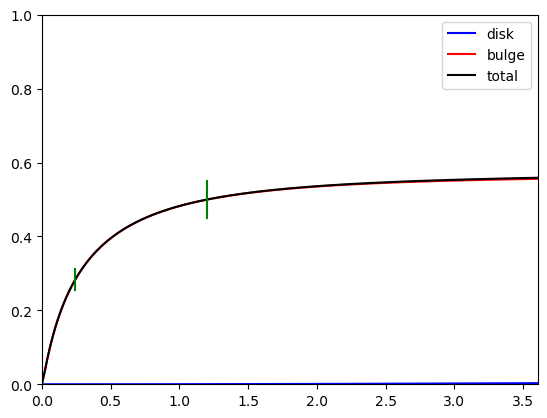

0.43441764369267577 0.5655823563073242
21.345604229740314 0.13700101310034804 1.202300940728132


In [43]:
a.half_mass_radius(Md,Rd,Mb,Rb,figure=True)
Mtot = Md+Mb
print(Md/Mtot,Mb/Mtot)
print(Md/Mtot*1.68*Rd,Mb/Mtot*Rb,tmp['GalpropHalfmassRadius'])

In [79]:
mask = np.logical_and(df['GalpropMstar'] > 1.e9, df['GalpropSatType']==0)
mask = np.logical_and(mask,df['GalpropMdisk']/df['GalpropMstar'] > 0.6)

In [80]:
dfm = df[mask]
dfm.shape

(224419, 58)

In [81]:
frac = (-dfm['GalpropHalfmassRadius']+dfm['GalpropWeightedRadius'])/dfm['GalpropHalfmassRadius']

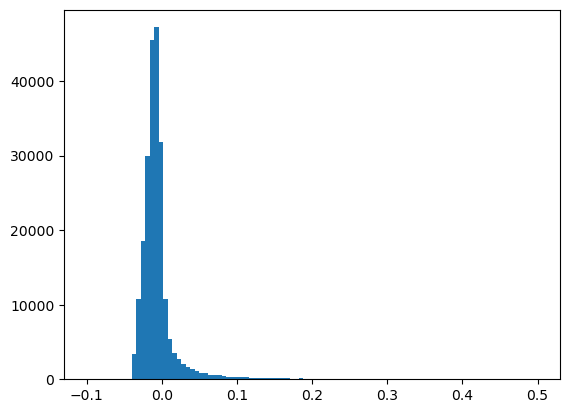

In [82]:
vals = plt.hist(frac,range=[-0.1,0.5],bins=100)

In [77]:
amax = np.argmax(frac)

In [78]:
tmp = dfm.iloc[amax,:]
tmp

GalpropMBH                          1.109660e+06
GalpropMH2                          1.413400e+08
GalpropMHI                          1.185830e+10
GalpropMHII                         8.283550e+09
GalpropMaccdot                      0.000000e+00
GalpropMaccdot_radio                8.544650e-07
GalpropMbulge                       8.549380e+08
GalpropMcold                        2.748350e+10
GalpropMstar                        1.065910e+09
GalpropMstar_merge                  1.620510e+08
GalpropMstrip                       3.012990e+11
GalpropMu_merger                    6.938620e-01
GalpropMvir                         3.012990e+11
GalpropOutflowRate_Mass             1.446830e+00
GalpropOutflowRate_Metal            4.900830e-02
GalpropRbulge                       4.423340e-03
GalpropRdisk                        1.140520e+01
GalpropRfric                        0.000000e+00
GalpropRhalo                        1.766120e+02
GalpropSatType                      0.000000e+00
GalpropSfr          

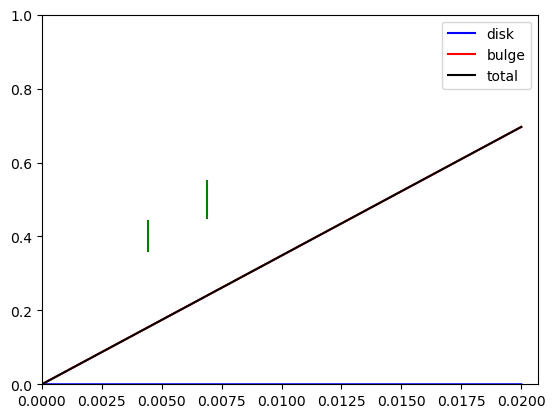

0.006896622493169373

In [71]:
Md = tmp['GalpropMdisk']
Mb = tmp['GalpropMbulge']
Rd = tmp['GalpropRdisk']
Rb = tmp['GalpropRbulge']
a.half_mass_radius(Md,Rd,Mb,Rb,figure=True)

In [72]:
Mtot = Md+Mb
print(Md/Mtot,Mb/Mtot)
print(Md/Mtot*1.68*Rd,Mb/Mtot*Rb,tmp['GalpropHalfmassRadius'])

0.19792666801692468 0.8020733319830753
3.792420634754078 0.0035478429329459703 0.006896622493169373


In [84]:
np.mean(np.abs(frac))

0.017785193793238067